In [3]:
import pandas as pd

import os
def data_dictionary():
    path_train="dataset/"
    list_train=os.listdir(path_train)
    train_dictionary={"image_path":[],"target":[]}
    k=0
    for i in list_train:
        
        path_disease_train=path_train+i
        image_list_train=os.listdir(path_disease_train)
        for j in image_list_train:
            img_path_train=path_disease_train+"/"+j   
            train_dictionary["image_path"].append(img_path_train)
            train_dictionary['target'].append(k)     
        k+=1
    train_df=pd.DataFrame(train_dictionary)
    return  train_df

In [7]:
data=data_dictionary()

In [8]:
data

,image_path,target
0,dataset/Actinic Keratosis Basal Cell Carcinoma...,0
1,dataset/Actinic Keratosis Basal Cell Carcinoma...,0
2,dataset/Actinic Keratosis Basal Cell Carcinoma...,0
3,dataset/Actinic Keratosis Basal Cell Carcinoma...,0
4,dataset/Actinic Keratosis Basal Cell Carcinoma...,0
...,...,...
23179,dataset/Melanoma Skin Cancer Nevi and Moles/no...,22
23180,dataset/Melanoma Skin Cancer Nevi and Moles/ro...,22
23181,dataset/Melanoma Skin Cancer Nevi and Moles/fl...,22
23182,dataset/Melanoma Skin Cancer Nevi and Moles/fl...,22


In [9]:
lable=data['target']

In [10]:
import cv2
images=[]
label=[]
from tensorflow.keras.applications.vgg19 import VGG19, preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
for i in data['image_path']:
    img = load_img(i, target_size=(100, 100))
    x = img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    images.append(x) 

2023-07-28 20:11:29.489250: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-28 20:11:34.391256: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/conda/lib/python3.10/site-packages/cv2/../../lib64:/usr/local/cuda/lib64:/usr/local/nccl2/lib:/usr/local/cuda/extras/CUPTI/lib64
2023-07-28 20:11:34.392706: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PA

In [11]:
import numpy as np
import pandas as pd
dataset=np.array(images)


In [16]:
del images

NameError: name 'images' is not defined

In [15]:
import gc 
gc.collect()

0

In [14]:
import os
import psutil

# Get process ID of this notebook
pid = os.getpid()

# Get memory usage information
process = psutil.Process(pid)
memory_info = process.memory_info()

# Print memory usage information
print('Memory usage: {:.2f} MB'.format(memory_info.rss / 1024 / 1024))

Memory usage: 6046.49 MB


In [17]:
memory_info

pmem(rss=6340206592, vms=8894132224, shared=244690944, text=2121728, lib=0, data=6802374656, dirty=0)

In [18]:
dataset.shape

(23184, 1, 100, 100, 3)

In [19]:
dataset = np.reshape(dataset, (23184, 100, 100, 3))

In [20]:
lable=np.array(lable)

In [21]:
lable.shape

(23184,)

In [22]:
import gc
# Delete variables from memory

#del images

In [23]:
gc.collect()

480

In [24]:
vgg_model = VGG19(weights = 'imagenet',  include_top = False, input_shape = (100,100 ,3))                                                                            

2023-07-28 20:34:14.567346: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/conda/lib/python3.10/site-packages/cv2/../../lib64:/usr/local/cuda/lib64:/usr/local/nccl2/lib:/usr/local/cuda/extras/CUPTI/lib64
2023-07-28 20:34:14.567444: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-07-28 20:34:14.567491: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (tensorflow-2-11-20230720-122152): /proc/driver/nvidia/version does not exist
2023-07-28 20:34:14.569434: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  A

In [25]:
# let's make all layers non-trainable
for layer in vgg_model.layers : 
    layer.trainable = False
    

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten, Dense


In [27]:
model=Sequential([  
                  Dense(200,activation='relu'),
                  Dense(170,activation='relu'),
                  Dense(23,activation='softmax'),

])

In [28]:
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

In [29]:
mcp_save = ModelCheckpoint('EnetB0_CIFAR10_TL.h5', save_best_only=True, monitor='val_acc')
reduce_lr = ReduceLROnPlateau(monitor='val_acc', factor=0.5, patience=2, verbose=1,)
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [30]:
from sklearn.model_selection import KFold 
from sklearn.model_selection import train_test_split 

In [31]:
import keras
acc=[]
num_classes = 23
lable = keras.utils.to_categorical(lable, num_classes)

In [32]:
lable.shape


(23184, 23)

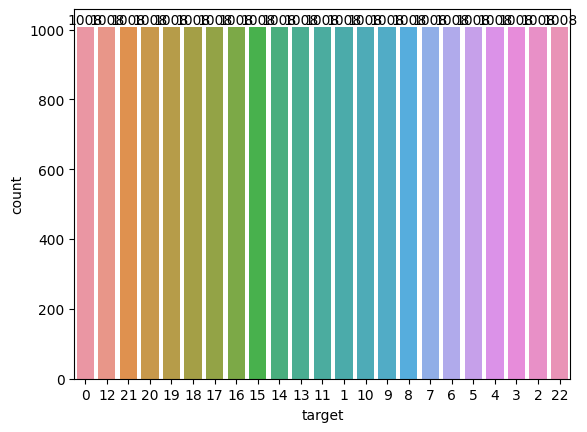

In [33]:
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import random
from PIL import Image
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras import Sequential, Model
from keras.layers import (Conv2D, MaxPooling2D, Dense, Flatten, 
                          Dropout, Input,GlobalAveragePooling2D,BatchNormalization)
from tensorflow.keras.activations import softmax
from tensorflow.keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from mpl_toolkits.axes_grid1 import ImageGrid
from keras.models import Model
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.metrics import (ConfusionMatrixDisplay, confusion_matrix, 
                             accuracy_score)
ax = sns.countplot(x=data['target'],
                   order=data['target'].value_counts(ascending=False).index);
abs_values = data['target'].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=abs_values);

Found 23184 images belonging to 23 classes.


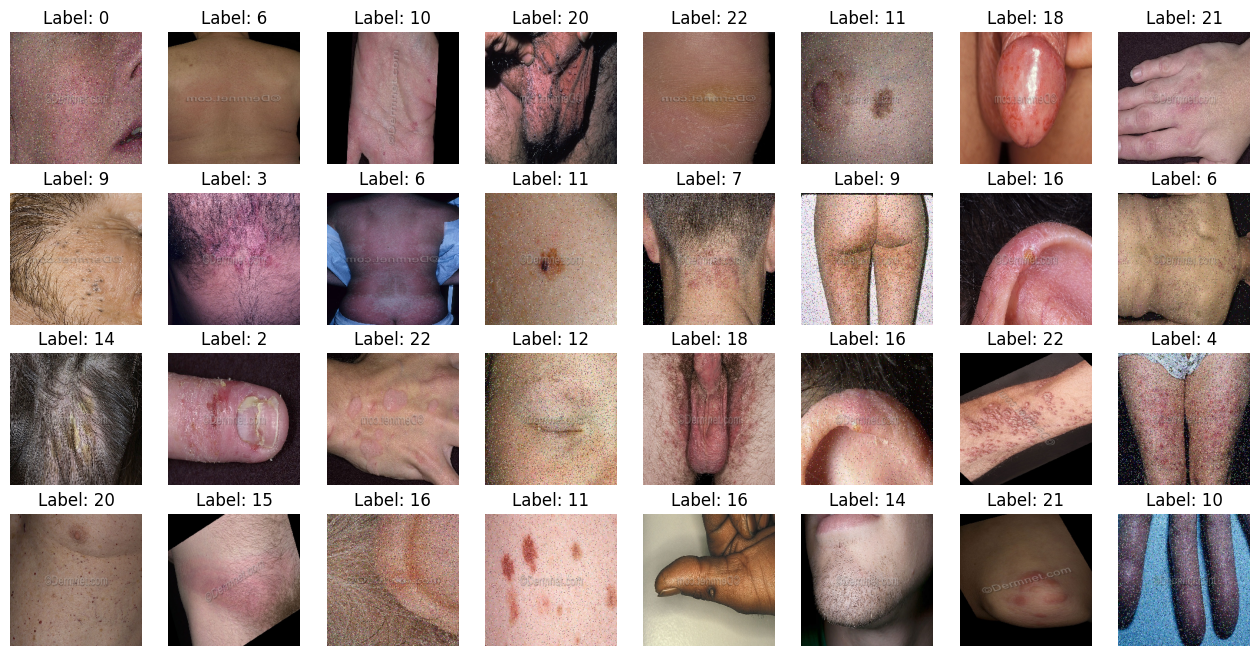

In [34]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the data generator
datagen = ImageDataGenerator(rescale=1./255)

# Generate a batch of images and labels
batch_size = 32
train_generator = datagen.flow_from_directory(
    'dataset/',
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical')

images, labels = next(train_generator)

# Plot the images
fig, ax = plt.subplots(4, 8, figsize=(16, 8))
for i in range(4):
    for j in range(8):
        ax[i, j].imshow(images[i*8+j])
        ax[i, j].axis('off')
        ax[i, j].set_title('Label: {}'.format(labels[i*8+j].argmax()))
plt.show()

In [35]:
del train_generator

In [ ]:
gc.collect()

2023-07-29 09:17:22.408769: W tensorflow/core/framework/op_kernel.cc:1830] OP_REQUIRES failed at conv_ops_fused_impl.h:756 : INVALID_ARGUMENT: convolution input must be 4-dimensional: [32,4608]


InvalidArgumentError: Graph execution error:

Detected at node 'vgg19/block1_conv1/Relu' defined at (most recent call last):
    File "/opt/conda/lib/python3.10/runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/opt/conda/lib/python3.10/runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "/opt/conda/lib/python3.10/site-packages/ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "/opt/conda/lib/python3.10/site-packages/traitlets/config/application.py", line 1043, in launch_instance
      app.start()
    File "/opt/conda/lib/python3.10/site-packages/ipykernel/kernelapp.py", line 725, in start
      self.io_loop.start()
    File "/opt/conda/lib/python3.10/site-packages/tornado/platform/asyncio.py", line 195, in start
      self.asyncio_loop.run_forever()
    File "/opt/conda/lib/python3.10/asyncio/base_events.py", line 603, in run_forever
      self._run_once()
    File "/opt/conda/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once
      handle._run()
    File "/opt/conda/lib/python3.10/asyncio/events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "/opt/conda/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 513, in dispatch_queue
      await self.process_one()
    File "/opt/conda/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 502, in process_one
      await dispatch(*args)
    File "/opt/conda/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 409, in dispatch_shell
      await result
    File "/opt/conda/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 729, in execute_request
      reply_content = await reply_content
    File "/opt/conda/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 422, in do_execute
      res = shell.run_cell(
    File "/opt/conda/lib/python3.10/site-packages/ipykernel/zmqshell.py", line 540, in run_cell
      return super().run_cell(*args, **kwargs)
    File "/opt/conda/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3009, in run_cell
      result = self._run_cell(
    File "/opt/conda/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3064, in _run_cell
      result = runner(coro)
    File "/opt/conda/lib/python3.10/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "/opt/conda/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3269, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/opt/conda/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3448, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "/opt/conda/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3508, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/var/tmp/ipykernel_4185764/84823572.py", line 1, in <module>
      features_train=vgg_model.predict(x_train)
    File "/opt/conda/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/opt/conda/lib/python3.10/site-packages/keras/engine/training.py", line 2350, in predict
      tmp_batch_outputs = self.predict_function(iterator)
    File "/opt/conda/lib/python3.10/site-packages/keras/engine/training.py", line 2137, in predict_function
      return step_function(self, iterator)
    File "/opt/conda/lib/python3.10/site-packages/keras/engine/training.py", line 2123, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/opt/conda/lib/python3.10/site-packages/keras/engine/training.py", line 2111, in run_step
      outputs = model.predict_step(data)
    File "/opt/conda/lib/python3.10/site-packages/keras/engine/training.py", line 2079, in predict_step
      return self(x, training=False)
    File "/opt/conda/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/opt/conda/lib/python3.10/site-packages/keras/engine/training.py", line 561, in __call__
      return super().__call__(*args, **kwargs)
    File "/opt/conda/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/opt/conda/lib/python3.10/site-packages/keras/engine/base_layer.py", line 1132, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/opt/conda/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "/opt/conda/lib/python3.10/site-packages/keras/engine/functional.py", line 511, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "/opt/conda/lib/python3.10/site-packages/keras/engine/functional.py", line 668, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "/opt/conda/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/opt/conda/lib/python3.10/site-packages/keras/engine/base_layer.py", line 1132, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/opt/conda/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "/opt/conda/lib/python3.10/site-packages/keras/layers/convolutional/base_conv.py", line 314, in call
      return self.activation(outputs)
    File "/opt/conda/lib/python3.10/site-packages/keras/activations.py", line 317, in relu
      return backend.relu(
    File "/opt/conda/lib/python3.10/site-packages/keras/backend.py", line 5369, in relu
      x = tf.nn.relu(x)
Node: 'vgg19/block1_conv1/Relu'
convolution input must be 4-dimensional: [32,4608]
	 [[{{node vgg19/block1_conv1/Relu}}]] [Op:__inference_predict_function_822663]

In [51]:

for i in range(3): 
    x_train,x_test, y_train, y_test=train_test_split(dataset, lable, test_size=0.1,random_state = np.random.randint(1,1000, 1)[0])
    x_train,x_valid,y_train,y_vaild=train_test_split(x_train,y_train,test_size=0.1)
    # let's make all layers non-trainable
    for layer in vgg_model.layers :
        layer.trainable = False
    features_train=vgg_model.predict(x_train)
    features_test=vgg_model.predict(x_test)
    features_vaild=vgg_model.predict(x_valid)
    #features_train.shape
    num_train=x_train.shape[0]
    num_test=x_test.shape[0]
    num_vaild=x_valid.shape[0]
    x_test=features_test.reshape(num_test,-1)
    x_train=features_train.reshape(num_train,-1)
    x_vaild=features_vaild.reshape(num_vaild,-1)
    #x_train,x_valid,y_train,y_valid= train_test_split(x_train, y_train, test_size=0.1,random_state = np.random.randint(1,1000, 1)[0]) 
    history=model.fit( x_train, y_train, validation_data=(x_vaild,y_vaild), epochs=50, batch_size=16,verbose=1) 
    model.evaluate(x_test,y_test)

66/66 [==============================] - 63s 950ms/step
Epoch 1/50
1174/1174 [==============================] - 8s 7ms/step - loss: 0.3028 - accuracy: 0.9833 - val_loss: 0.3275 - val_accuracy: 0.9823
Epoch 2/50
1174/1174 [==============================] - 8s 7ms/step - loss: 0.1074 - accuracy: 0.9889 - val_loss: 0.0858 - val_accuracy: 0.9875
Epoch 3/50
1174/1174 [==============================] - 8s 7ms/step - loss: 0.0611 - accuracy: 0.9905 - val_loss: 0.3921 - val_accuracy: 0.9851
Epoch 4/50
1174/1174 [==============================] - 9s 7ms/step - loss: 0.1359 - accuracy: 0.9877 - val_loss: 0.3310 - val_accuracy: 0.9880
Epoch 5/50
1174/1174 [==============================] - 8s 7ms/step - loss: 0.1111 - accuracy: 0.9884 - val_loss: 0.1319 - val_accuracy: 0.9866
Epoch 6/50
1174/1174 [==============================] - 8s 7ms/step - loss: 0.1697 - accuracy: 0.9864 - val_loss: 0.2350 - val_accuracy: 0.9851
Epoch 7/50
1174/1174 [==============================] - 8s 7ms/step - loss: 0.11

In [52]:
y_pred=model.predict(x_test)
y_pred=np.argmax(y_pred, axis=1)
y_pred

73/73 [==============================] - 0s 2ms/step


array([10, 15, 18, ...,  7, 12, 18])

In [53]:
y_test=np.argmax(y_test, axis=1)

In [54]:
y_test

array([10, 15, 18, ...,  7, 12, 18])

In [55]:
from sklearn.metrics import *
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       118
           1       0.99      0.99      0.99        99
           2       1.00      0.99      0.99        98
           3       0.95      0.90      0.92       105
           4       0.99      1.00      1.00       105
           5       0.97      0.99      0.98       101
           6       1.00      0.99      1.00       109
           7       0.98      1.00      0.99        98
           8       1.00      0.99      1.00       111
           9       1.00      1.00      1.00        99
          10       0.90      0.95      0.93       108
          11       1.00      1.00      1.00        92
          12       1.00      0.95      0.98        83
          13       0.99      0.99      0.99       102
          14       0.97      1.00      0.99       104
          15       1.00      0.99      0.99        99
          16       0.99      0.99      0.99        99
          17       1.00    

In [56]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[118   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0  98   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0
    0   0   0   0   0]
 [  0   0  97   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0   0   0  94   0   0   0   0   0   0  11   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0   0   0   0 105   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0   0   0   0   0 100   0   0   0   0   0   0   0   0   1   0   0   0
    0   0   0   0   0]
 [  0   0   0   0   0   0 108   0   0   0   0   0   0   1   0   0   0   0
    0   0   0   0   0]
 [  0   0   0   0   0   0   0  98   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 110   0   0   0   0   0   0   0   0   0
    0   0   0   1   0]
 [  0   0   0   0   0   0   0   0   0  99   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0   0   0   5   0   0   0 

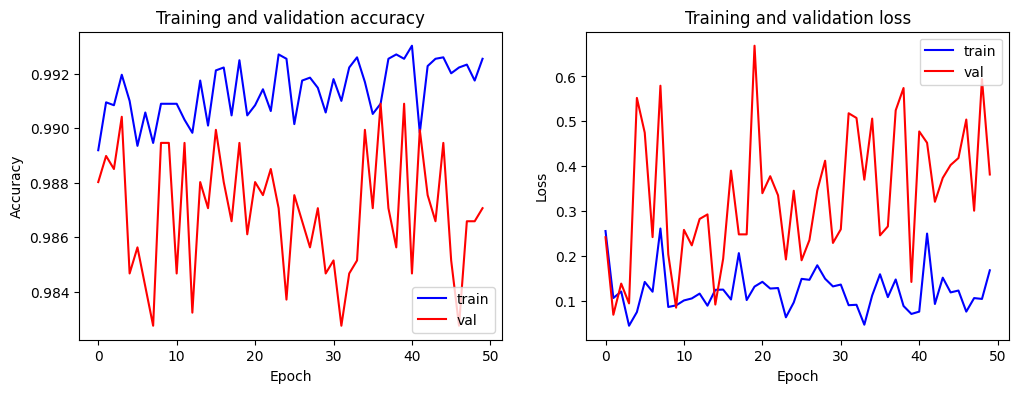

In [57]:
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(train_accuracy))
plt.figure(figsize=(12,4))

# Plotting the accuracy
plt.subplot(1,2,1)
plt.plot(epochs, train_accuracy, 'b', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'val'], loc='lower right')

# Plotting the loss
plt.subplot(1,2,2)
plt.plot(epochs, train_loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train', 'val'], loc='upper right')